Multi Label Classification using Glove Embedding


*Gomathi A*

In [ ]:
# Importing necessary libraries
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output
#Downloading required libraries in nltk
import nltk
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('punkt')

!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer

from nltk.tokenize import RegexpTokenizer
import re
import string
import random
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
##returned_labels_MASTER.csv
##https://drive.google.com/file/d/11XhYcbekGu5y_9c5qXag9jDAMAyALsl7/view?usp=sharing
#Check autorisation before reading input file

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
downloaded = drive.CreateFile({'id':"11XhYcbekGu5y_9c5qXag9jDAMAyALsl7"})   # replace the id with id of file you want to access
downloaded.GetContentFile('returned_labels_MASTER.csv')        # replace the file name with your file

In [ ]:
#Reading and displaying (few) records from allreviews.csv
data = pd.read_csv("returned_labels_MASTER.csv",sep=",")
data.head(100)

,ID_allreviews_index,ReviewContent,what was reviewed?,product sentiment,was product effective in general?,was product effective for STRESS?,was product effective for SLEEP?,was product effective for ANXIETY?,did review mention any SIDE EFFECT?,ProductName
0,996572.0,Doesn't detoxify you. It contains a laxative o...,1 - Just the Product or unknown,2=Negative,2 - NO does not work,3 - review does not say,3 - review does not say,3 - review does not say,1 - YES,NaN
1,903580.0,As soon as the outside coating is chewed into ...,1 - Just the Product or unknown,2=Negative,3 - review does not say,3 - review does not say,3 - review does not say,3 - review does not say,0 - NO,NaN
2,867266.0,"They usually work half of the time, the other ...",1 - Just the Product or unknown,2=Negative,2 - NO does not work,3 - review does not say,3 - review does not say,3 - review does not say,0 - NO,NaN
3,441846.0,I was hopeful after reading many positive revi...,1 - Just the Product or unknown,2=Negative,2 - NO does not work,3 - review does not say,3 - review does not say,3 - review does not say,0 - NO,NaN
4,710495.0,This product has made my life and my family's ...,1 - Just the Product or unknown,1=Positive,1 - YES,3 - review does not say,2 - NO does not work,1 - YES,0 - NO,NaN
...,...,...,...,...,...,...,...,...,...,...
95,846913.0,these actually made me gag.--they have a funny...,1 - Just the Product or unknown,2=Negative,3 - review does not say,3 - review does not say,3 - review does not say,3 - review does not say,1 - YES,NaN
96,1141853.0,Average taste.,1 - Just the Product or unknown,0=Neutral,3 - review does not say,3 - review does not say,3 - review does not say,3 - review does not say,0 - NO,NaN
97,556198.0,I add this to my coffee in the mornings. I do ...,1 - Just the Product or unknown,2=Negative,2 - NO does not work,3 - review does not say,3 - review does not say,3 - review does not say,0 - NO,NaN
98,39975.0,It's not coffee and no one who is honest and d...,1 - Just the Product or unknown,2=Negative,1 - YES,3 - review does not say,3 - review does not say,3 - review does not say,0 - NO,NaN


In [ ]:
data.count

<bound method DataFrame.count of       ID_allreviews_index  ...                                        ProductName
0                996572.0  ...                                                NaN
1                903580.0  ...                                                NaN
2                867266.0  ...                                                NaN
3                441846.0  ...                                                NaN
4                710495.0  ...                                                NaN
...                   ...  ...                                                ...
4736             385173.0  ...  Pure Natural Ceylon Cinnamon 1200mg - 120 Caps...
4737             712448.0  ...  Natural Balance Happy Camper, 120-Vegetarian C...
4738            1386332.0  ...  Instant Hemp Pain Relief Cream - 1,000,000 Mg ...
4739            1343222.0  ...  Turmeric Curcumin - 2250mg/d - Veggie Caps - 9...
4740            1358999.0  ...  (2-Pack) Hemp Cream Pain Relief L

In [ ]:
#Initializing labels
data['Rvw_Prod'] = np.where(data['what was reviewed?']== '1 - Just the Product or unknown', 1, 0)
data['Rvw_Service'] = np.where(data['what was reviewed?']== '0 - Just the Service', 1, 0)
data['Rvw_Both'] = np.where(data['what was reviewed?']== '2 - Both', 1, 0)

data['Prod_Pos'] = np.where(data['product sentiment']== '1=Positive', 1, 0)
data['Prod_Neg'] = np.where(data['product sentiment']== '2=Negative', 1, 0)
data['Prod_Neutral'] = np.where(data['product sentiment']== '0=Neutral', 1, 0)

data['Eff_Gen_Y'] = np.where(data['was product effective in general?']== '1 - YES', 1, 0)
data['Eff_Gen_N'] = np.where(data['was product effective in general?']== '2 - NO does not work', 1, 0)
data['Eff_Gen_NotSay'] = np.where(data['was product effective in general?']== '3 - review does not say', 1, 0)


In [ ]:
data['Eff_Stress_Y'] = np.where(data['was product effective for STRESS?']== '1 - YES', 1, 0)
data['Eff_Stress_N'] = np.where(data['was product effective for STRESS?']== '2 - NO does not work', 1, 0)
data['Eff_Stress_NotSay'] = np.where(data['was product effective for STRESS?']== '3 - review does not say', 1, 0)

data['Eff_Sleep_Y'] = np.where(data['was product effective for SLEEP?']== '1 - YES', 1, 0)
data['Eff_Sleep_N'] = np.where(data['was product effective for SLEEP?']== '2 - NO does not work', 1, 0)
data['Eff_Sleep_NotSay'] = np.where(data['was product effective for SLEEP?']== '3 - review does not say', 1, 0)

data['Eff_Anxty_Y'] = np.where(data['was product effective for ANXIETY?']== '1 - YES', 1, 0)
data['Eff_Anxty_N'] = np.where(data['was product effective for ANXIETY?']== '2 - NO does not work', 1, 0)
data['Eff_Anxty_NotSay'] = np.where(data['was product effective for ANXIETY?']== '3 - review does not say', 1, 0)

data['SideEff_Y'] = np.where(data['did review mention any SIDE EFFECT?']== '1 - YES', 1, 0)
data['SideEff_N'] = np.where(data['did review mention any SIDE EFFECT?']== '0 - NO', 1, 0)


In [ ]:
#Displaying few records
data.head(5)

,ID_allreviews_index,ReviewContent,what was reviewed?,product sentiment,was product effective in general?,was product effective for STRESS?,was product effective for SLEEP?,was product effective for ANXIETY?,did review mention any SIDE EFFECT?,ProductName,Rvw_Prod,Rvw_Service,Rvw_Both,Prod_Pos,Prod_Neg,Prod_Neutral,Eff_Gen_Y,Eff_Gen_N,Eff_Gen_NotSay,Eff_Stress_Y,Eff_Stress_N,Eff_Stress_NotSay,Eff_Sleep_Y,Eff_Sleep_N,Eff_Sleep_NotSay,Eff_Anxty_Y,Eff_Anxty_N,Eff_Anxty_NotSay,SideEff_Y,SideEff_N
0,996572.0,Doesn't detoxify you. It contains a laxative o...,1 - Just the Product or unknown,2=Negative,2 - NO does not work,3 - review does not say,3 - review does not say,3 - review does not say,1 - YES,NaN,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0
1,903580.0,As soon as the outside coating is chewed into ...,1 - Just the Product or unknown,2=Negative,3 - review does not say,3 - review does not say,3 - review does not say,3 - review does not say,0 - NO,NaN,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1
2,867266.0,"They usually work half of the time, the other ...",1 - Just the Product or unknown,2=Negative,2 - NO does not work,3 - review does not say,3 - review does not say,3 - review does not say,0 - NO,NaN,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1
3,441846.0,I was hopeful after reading many positive revi...,1 - Just the Product or unknown,2=Negative,2 - NO does not work,3 - review does not say,3 - review does not say,3 - review does not say,0 - NO,NaN,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1
4,710495.0,This product has made my life and my family's ...,1 - Just the Product or unknown,1=Positive,1 - YES,3 - review does not say,2 - NO does not work,1 - YES,0 - NO,NaN,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1


In [ ]:
#Assigning data labels
data_labels=data[["Rvw_Prod","Rvw_Service","Rvw_Both","Prod_Pos","Prod_Neg","Prod_Neutral",
"Eff_Gen_Y","Eff_Gen_N","Eff_Gen_NotSay","Eff_Stress_Y","Eff_Stress_N","Eff_Stress_NotSay",
"Eff_Sleep_Y","Eff_Sleep_N","Eff_Sleep_NotSay","Eff_Anxty_Y","Eff_Anxty_N","Eff_Anxty_NotSay",
"SideEff_Y","SideEff_N"]]

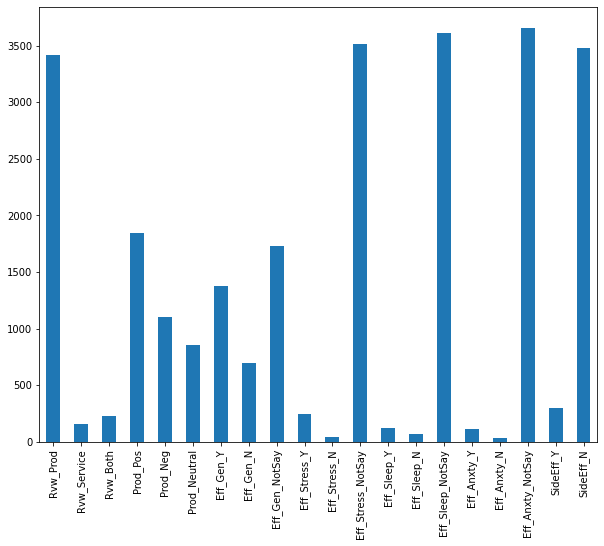

In [ ]:
#Histogram display of data labels
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

data_labels.sum(axis=0).plot.bar()

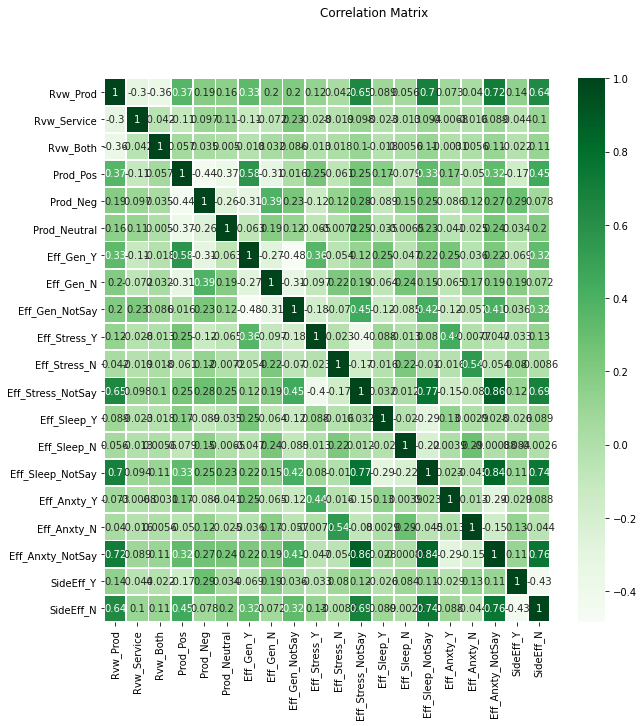

In [ ]:
#Correlation Matrix of Data labels 
import seaborn as sns

fig, ax = plt.subplots(figsize=(10, 10))
fig.suptitle('Correlation Matrix')
sns.heatmap(data_labels.corr(), annot=True, cmap="Greens", linewidths=.8, ax=ax);

In [ ]:
data_new=data[["ReviewContent","Rvw_Prod","Rvw_Service","Rvw_Both","Prod_Pos","Prod_Neg","Prod_Neutral","Eff_Gen_Y","Eff_Gen_N","Eff_Gen_NotSay","Eff_Stress_Y","Eff_Stress_N","Eff_Stress_NotSay",
"Eff_Sleep_Y","Eff_Sleep_N","Eff_Sleep_NotSay","Eff_Anxty_Y","Eff_Anxty_N","Eff_Anxty_NotSay","SideEff_Y","SideEff_N"]]
data_new.head(5)
data_X=data[["ReviewContent"]]
data_Y=data[["Rvw_Prod","Rvw_Service","Rvw_Both","Prod_Pos","Prod_Neg","Prod_Neutral","Eff_Gen_Y","Eff_Gen_N","Eff_Gen_NotSay","Eff_Stress_Y","Eff_Stress_N","Eff_Stress_NotSay",
"Eff_Sleep_Y","Eff_Sleep_N","Eff_Sleep_NotSay","Eff_Anxty_Y","Eff_Anxty_N","Eff_Anxty_NotSay","SideEff_Y","SideEff_N"]]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data_X, data_Y, test_size=0.20, random_state=111)


In [ ]:
x_train

,ReviewContent
2148,Did not notice any mental difference; results ...
4507,Great taste and puts you at ease.
4293,It did not do anything to help my stress. I we...
1759,I love this lipstick! It goes on smoothly and...
4150,Looked interesting when I saw it on a grocery ...
...,...
4214,"I just started taking this product, and I am h..."
681,I guess I'm healthier? I don't know. I don't h...
4182,Love this tea at the end of day to wind down a...
2004,"I love the Republic of Tea, especially the ""Ge..."


In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
import tensorflow as tf

vectorizer = TextVectorization(max_tokens=20000, output_sequence_length=250)
text_ds = tf.data.Dataset.from_tensor_slices(x_train).batch(128)
vectorizer.adapt(text_ds)

In [ ]:
vocab_size=len(vectorizer.get_vocabulary())
X_train = vectorizer(x_train).numpy()
X_test = vectorizer(x_test).numpy()

In [ ]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
print("Training data shape:",X_train.shape)
print("Training data labels shape:",y_train.shape)

print("Test data shape:",X_test.shape)
print("Test data labels shape:",y_test.shape)

Training data shape: (3792, 250)
Training data labels shape: (3792, 20)
Test data shape: (949, 250)
Test data labels shape: (949, 20)


In [ ]:
voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

In [ ]:
embeddings_index = {} # empty dictionary
f = open('/content/drive/Shareddrives/Gom_Project/Models/glove.6B.200d.txt', encoding="utf-8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_dim = 200

# Get 100-dim dense vector for each of the 10000 words in out vocabulary
embedding_matrix = np.zeros((vocab_size, embedding_dim))

for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in the embedding index will be all zeros
        embedding_matrix[i] = embedding_vector
        
embedding_matrix.shape

nonzero_elements = np.count_nonzero(np.count_nonzero(embedding_matrix, axis=1))
nonzero_elements / vocab_size

0.8517428700769579

In [ ]:
maxlen=250


RNN with GLOVE

In [ ]:
from keras.layers import Dense, Input, LSTM, SimpleRNN, Embedding, Dropout, SpatialDropout1D, Activation, Conv1D,GRU
from keras.layers import Conv1D, Bidirectional, GlobalMaxPool1D, MaxPooling1D, BatchNormalization, Add, Flatten
from keras.optimizers import Adam
from keras.models import Model, Input, Sequential
from keras.callbacks import EarlyStopping,ModelCheckpoint


RNN_Glove_model = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=maxlen, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Fully-connected RNN where the output is to be fed back to input.
    SimpleRNN(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(20, activation = 'sigmoid')
])


RNN_Glove_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])

early = EarlyStopping(monitor="val_loss", mode="min", patience=4)

In [ ]:
num_epochs=15
#RNN_Glove_model_fit = RNN_Glove_model.fit(X_train, y_train, batch_size=100, epochs=20, validation_split=0.1, callbacks=[early])
RNN_Glove_model.load_weights('/content/drive/Shareddrives/Gom_Project/Models/RNN_Glove_model1.h5')

Epoch 1/20
35/35 [==============================] - 6s 116ms/step - loss: 0.5686 - accuracy: 0.0429 - val_loss: 0.4281 - val_accuracy: 0.0000e+00
Epoch 2/20
35/35 [==============================] - 3s 99ms/step - loss: 0.3692 - accuracy: 0.0000e+00 - val_loss: 0.4294 - val_accuracy: 0.0000e+00
Epoch 3/20
35/35 [==============================] - 3s 99ms/step - loss: 0.3692 - accuracy: 0.0000e+00 - val_loss: 0.4190 - val_accuracy: 0.0000e+00
Epoch 4/20
35/35 [==============================] - 3s 99ms/step - loss: 0.3721 - accuracy: 0.0095 - val_loss: 0.4161 - val_accuracy: 0.0000e+00
Epoch 5/20
35/35 [==============================] - 3s 99ms/step - loss: 0.3736 - accuracy: 0.0000e+00 - val_loss: 0.4244 - val_accuracy: 0.0000e+00
Epoch 6/20
35/35 [==============================] - 3s 99ms/step - loss: 0.3664 - accuracy: 0.0021 - val_loss: 0.4212 - val_accuracy: 0.0000e+00
Epoch 7/20
35/35 [==============================] - 3s 98ms/step - loss: 0.3662 - accuracy: 0.1523 - val_loss: 0.3994

In [ ]:
RNN_Glove_train_score = RNN_Glove_model.evaluate(X_train, y_train,verbose = 1)
print('Train loss:', RNN_Glove_train_score[0])
print('Train accuracy:', RNN_Glove_train_score[1])

RNN_Glove_test_score = RNN_Glove_model.evaluate(X_test, y_test,verbose = 1)
print('Test loss:', RNN_Glove_test_score[0])
print('Test accuracy:', RNN_Glove_test_score[1])

119/119 [==============================] - 2s 19ms/step - loss: 0.3722 - accuracy: 0.4826
Train loss: 0.37223076820373535
Train accuracy: 0.48259493708610535
30/30 [==============================] - 1s 19ms/step - loss: 0.3728 - accuracy: 0.4499
Test loss: 0.37278038263320923
Test accuracy: 0.449947327375412


In [ ]:
RNN_Glove_model.save('/content/drive/Shareddrives/Gom_Project/Models/RNN_Glove_model1.h5')


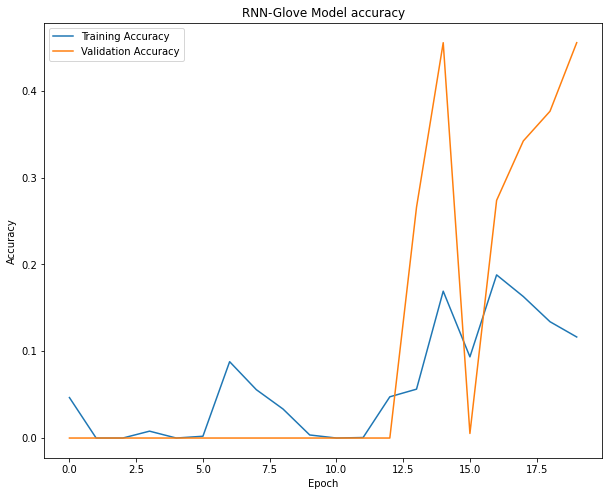

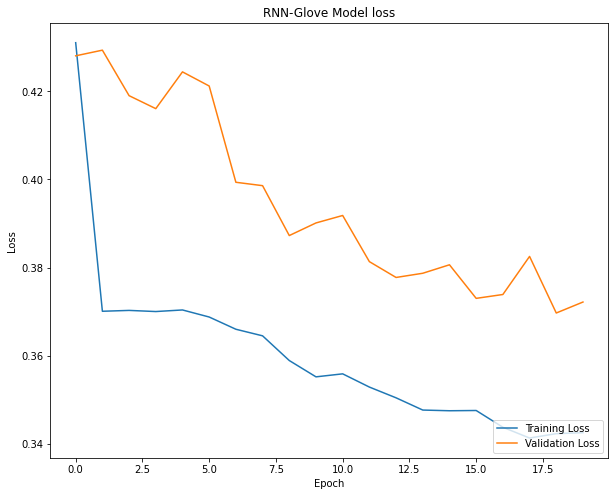

In [ ]:
# Plot training & validation accuracy values
plt.plot(RNN_Glove_model_fit.history['accuracy'])
plt.plot(RNN_Glove_model_fit.history['val_accuracy'])
plt.title('RNN-Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(RNN_Glove_model_fit.history['loss'])
plt.plot(RNN_Glove_model_fit.history['val_loss'])
plt.title('RNN-Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

LSTM +Glove model

In [ ]:
LSTM_Glove_model = Sequential([
    Embedding(input_dim =embedding_matrix.shape[0], input_length=maxlen, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False),
    SpatialDropout1D(0.5),
    #Bidirectional layer will enable our model to predict a missing word in a sequence, 
    #So, using this feature will enable the model to look at the context on both the left and the right.
    LSTM(25, return_sequences=True),
    #**batch normalization layer** normalizes the activations of the previous layer at each batch, 
    #i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1. 
    BatchNormalization(),
    Dropout(0.5),
    GlobalMaxPool1D(),
    Dense(50, activation = 'relu'),
    Dense(20, activation = 'sigmoid')
])

LSTM_Glove_model.compile(loss='binary_crossentropy', optimizer=Adam(0.01), metrics=['accuracy'])

In [ ]:
LSTM_Glove_model.summary()
#plot the CNN_GLove model architecture

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 250, 200)          1767200   
_________________________________________________________________
spatial_dropout1d_4 (Spatial (None, 250, 200)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 250, 25)           22600     
_________________________________________________________________
batch_normalization_3 (Batch (None, 250, 25)           100       
_________________________________________________________________
dropout_3 (Dropout)          (None, 250, 25)           0         
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 25)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)               

In [ ]:
LSTM_Glove_model.load_weights('/content/drive/Shareddrives/Gom_Project/Models/LSTM_Glove_model1.h5')
#LSTM_Glove_model_fit = LSTM_Glove_model.fit(X_train, y_train, batch_size=100, epochs=20, validation_split=0.1, callbacks=[early])

Epoch 1/20
35/35 [==============================] - 9s 183ms/step - loss: 0.5906 - accuracy: 0.0659 - val_loss: 0.4836 - val_accuracy: 0.0000e+00
Epoch 2/20
35/35 [==============================] - 6s 161ms/step - loss: 0.3697 - accuracy: 0.0547 - val_loss: 0.4609 - val_accuracy: 0.1132
Epoch 3/20
35/35 [==============================] - 6s 163ms/step - loss: 0.3531 - accuracy: 0.1093 - val_loss: 0.4305 - val_accuracy: 0.1789
Epoch 4/20
35/35 [==============================] - 6s 162ms/step - loss: 0.3305 - accuracy: 0.2130 - val_loss: 0.4244 - val_accuracy: 0.1211
Epoch 5/20
35/35 [==============================] - 6s 161ms/step - loss: 0.3114 - accuracy: 0.2501 - val_loss: 0.3899 - val_accuracy: 0.3789
Epoch 6/20
35/35 [==============================] - 6s 164ms/step - loss: 0.2974 - accuracy: 0.2505 - val_loss: 0.3641 - val_accuracy: 0.4395
Epoch 7/20
35/35 [==============================] - 6s 164ms/step - loss: 0.2956 - accuracy: 0.2959 - val_loss: 0.3507 - val_accuracy: 0.3763
Ep

In [ ]:
#train
LSTM_Glove_train_score = LSTM_Glove_model.evaluate(X_train, y_train,verbose=1)
print('Train Loss:', LSTM_Glove_train_score[0])
print('Train Accuracy:', LSTM_Glove_train_score[1])

#test
LSTM_Glove_test_score = LSTM_Glove_model.evaluate(X_test, y_test,verbose=1)
print('Test Loss:', LSTM_Glove_test_score[0])
print('Test Accuracy:', LSTM_Glove_test_score[1])

119/119 [==============================] - 3s 27ms/step - loss: 0.2792 - accuracy: 0.3692
Train Loss: 0.279155433177948
Train Accuracy: 0.3691983222961426
30/30 [==============================] - 1s 26ms/step - loss: 0.2922 - accuracy: 0.3446
Test Loss: 0.292174369096756
Test Accuracy: 0.3445732295513153


In [ ]:
LSTM_Glove_model.save('/content/drive/Shareddrives/Gom_Project/Models/LSTM_Glove_model1.h5')

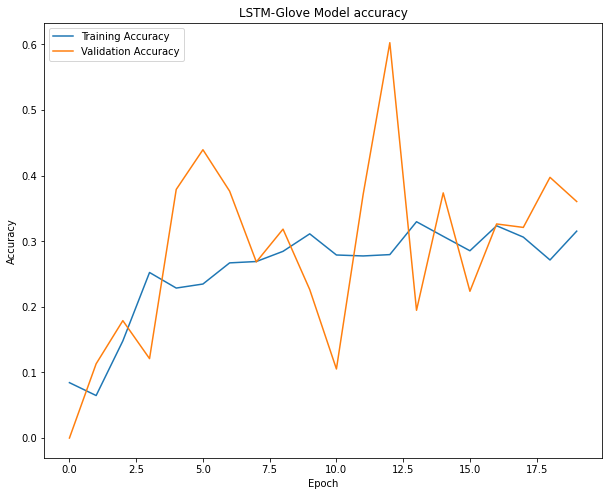

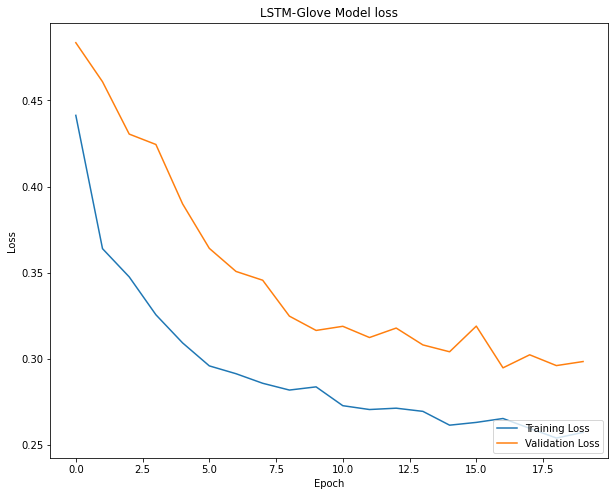

In [ ]:
### Plot Training & Validation Accuracy with the Loss values of the LSTM-Glove Model# Plot training & validation accuracy values
plt.plot(LSTM_Glove_model_fit.history['accuracy'])
plt.plot(LSTM_Glove_model_fit.history['val_accuracy'])
plt.title('LSTM-Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(LSTM_Glove_model_fit.history['loss'])
plt.plot(LSTM_Glove_model_fit.history['val_loss'])
plt.title('LSTM-Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

Bidirectional Gated Recurrent (GRU) + Glove

In [ ]:
from keras.layers import GlobalMaxPooling1D, GlobalAveragePooling1D, concatenate, SpatialDropout1D


sequence_input = Input(shape=(maxlen, ))
model = Embedding(input_dim =embedding_matrix.shape[0], input_length=maxlen, output_dim=embedding_matrix.shape[1],weights=[embedding_matrix], trainable=False)(sequence_input)
model = SpatialDropout1D(0.2)(model)
model = Bidirectional(GRU(128, return_sequences=True,dropout=0.1,recurrent_dropout=0.1))(model)
model = Conv1D(64, kernel_size = 3, padding = "valid", kernel_initializer = "glorot_uniform")(model)
avg_pool = GlobalAveragePooling1D()(model)
max_pool = GlobalMaxPooling1D()(model)
model = concatenate([avg_pool, max_pool]) 
preds = Dense(20, activation="sigmoid")(model)
Bil_GRU_Glove_model = Model(sequence_input, preds)
Bil_GRU_Glove_model.compile(loss='binary_crossentropy',optimizer=Adam(learning_rate=1e-3),metrics=['accuracy'])

In [ ]:
Bil_GRU_Glove_model.summary()

#plot the GRU model architecture


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 250)]        0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 250, 200)     1767200     input_3[0][0]                    
__________________________________________________________________________________________________
spatial_dropout1d_6 (SpatialDro (None, 250, 200)     0           embedding_6[0][0]                
__________________________________________________________________________________________________
bidirectional_2 (Bidirectional) (None, 250, 256)     253440      spatial_dropout1d_6[0][0]        
____________________________________________________________________________________________

In [ ]:
Bil_GRU_Glove_model.load_weights('/content/drive/Shareddrives/Gom_Project/Models/model_bigru_final.h5')

#Bil_GRU_Glove_model_fit = Bil_GRU_Glove_model.fit(X_train, y_train, batch_size=100, epochs=7, validation_split=0.1, callbacks=[early])

Epoch 1/7
35/35 [==============================] - 92s 2s/step - loss: 0.4929 - accuracy: 0.0456 - val_loss: 0.3695 - val_accuracy: 0.9079
Epoch 2/7
35/35 [==============================] - 83s 2s/step - loss: 0.3558 - accuracy: 0.3408 - val_loss: 0.3375 - val_accuracy: 0.0737
Epoch 3/7
35/35 [==============================] - 82s 2s/step - loss: 0.3183 - accuracy: 0.1528 - val_loss: 0.3074 - val_accuracy: 0.1395
Epoch 4/7
35/35 [==============================] - 82s 2s/step - loss: 0.2979 - accuracy: 0.2070 - val_loss: 0.2904 - val_accuracy: 0.2289
Epoch 5/7
35/35 [==============================] - 82s 2s/step - loss: 0.2717 - accuracy: 0.2127 - val_loss: 0.2765 - val_accuracy: 0.2395
Epoch 6/7
35/35 [==============================] - 82s 2s/step - loss: 0.2565 - accuracy: 0.2266 - val_loss: 0.2625 - val_accuracy: 0.2158
Epoch 7/7
35/35 [==============================] - 83s 2s/step - loss: 0.2472 - accuracy: 0.2166 - val_loss: 0.2598 - val_accuracy: 0.1868


In [ ]:
Bil_GRU_Glove_model.save('/content/drive/Shareddrives/Gom_Project/Models/model_bigru_final.h5')

In [ ]:
#Train
Bil_GRU_Glove_train_score = Bil_GRU_Glove_model.evaluate(X_train, y_train, verbose=1)
print('Train Loss:', Bil_GRU_Glove_train_score[0])
print('Train Accuracy:', Bil_GRU_Glove_train_score[1])

#Test
Bil_GRU_Glove_test_score = Bil_GRU_Glove_model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', Bil_GRU_Glove_test_score[0])
print('Test Accuracy:', Bil_GRU_Glove_test_score[1])

119/119 [==============================] - 19s 161ms/step - loss: 0.2329 - accuracy: 0.2020
Train Loss: 0.23291245102882385
Train Accuracy: 0.20200422406196594
30/30 [==============================] - 5s 161ms/step - loss: 0.2487 - accuracy: 0.1855
Test Loss: 0.2486545741558075
Test Accuracy: 0.18545837700366974


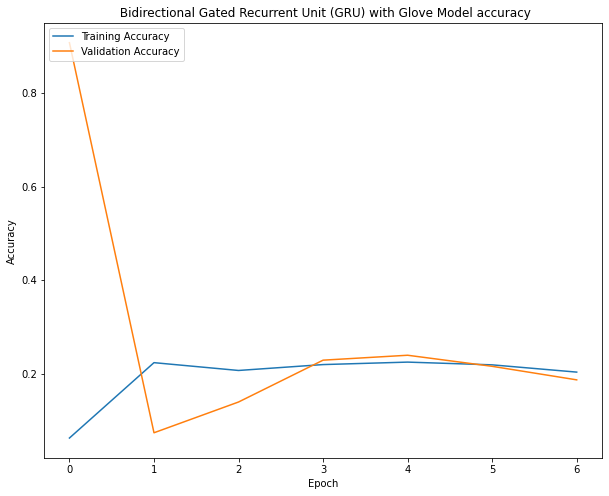

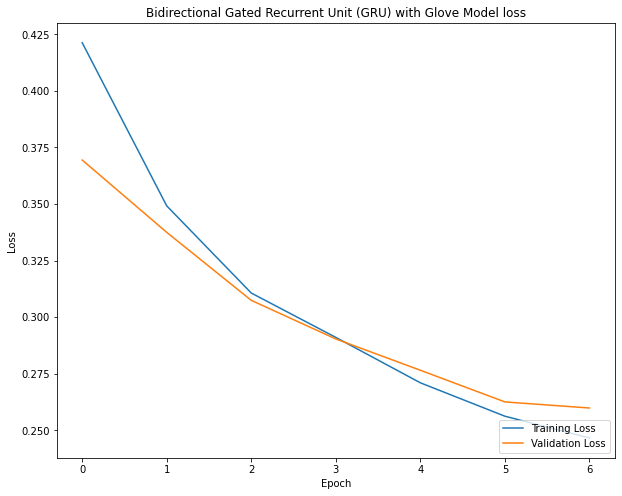

In [ ]:
# Plot training & validation accuracy values
plt.plot(Bil_GRU_Glove_model_fit.history['accuracy'])
plt.plot(Bil_GRU_Glove_model_fit.history['val_accuracy'])
plt.title(' Bidirectional Gated Recurrent Unit (GRU) with Glove Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(Bil_GRU_Glove_model_fit.history['loss'])
plt.plot(Bil_GRU_Glove_model_fit.history['val_loss'])
plt.title('Bidirectional Gated Recurrent Unit (GRU) with Glove Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'], loc='lower right')
plt.show()

In [ ]:
labels=["Rvw_Prod","Rvw_Service","Rvw_Both","Prod_Pos","Prod_Neg","Prod_Neutral","Eff_Gen_Y","Eff_Gen_N","Eff_Gen_NotSay","Eff_Stress_Y","Eff_Stress_N","Eff_Stress_NotSay",
"Eff_Sleep_Y","Eff_Sleep_N","Eff_Sleep_NotSay","Eff_Anxty_Y","Eff_Anxty_N","Eff_Anxty_NotSay","SideEff_Y","SideEff_N"]
Bil_GRU_Glove_yhat = Bil_GRU_Glove_model.predict(X_test)
result=[]
for y_pred in Bil_GRU_Glove_yhat:
  #print(y_pred)
  class_labels=[labels[i] for i,prob in enumerate(y_pred) if prob > 0.5]
  result.append(class_labels)


In [ ]:
print(len(result))

949


In [ ]:
data1=["The product is good. It relax me well."]
len(data1)

1

In [ ]:
data2 = vectorizer(data1).numpy()
data2

array([[  3,  17,  12,  28,   5, 437,  21,  81,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [ ]:
data2 = vectorizer(data1).numpy()

single = RNN_Glove_model.predict(data2)
#print("y_pred",single)
#print("shape",single.shape)

result=[]
for y_pred in single:
  #print(y_pred)
  class_labels=[labels[i] for i,prob in enumerate(y_pred) if prob > 0.5]
  result.append(class_labels)

print(result)


[['Rvw_Prod', 'Prod_Pos', 'Eff_Stress_NotSay', 'Eff_Sleep_NotSay', 'Eff_Anxty_NotSay', 'SideEff_N']]


In [ ]:
data2 = vectorizer(data1).numpy()

single = Bil_GRU_Glove_model.predict(data2)
#print("y_pred",single)
#print("shape",single.shape)

result=[]
for y_pred in single:
  #print(y_pred)
  class_labels=[labels[i] for i,prob in enumerate(y_pred) if prob > 0.5]
  result.append(class_labels)

print(result)


[['Rvw_Prod', 'Prod_Pos', 'Eff_Gen_Y', 'Eff_Sleep_NotSay', 'Eff_Anxty_NotSay', 'SideEff_N']]
